In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import RobustScaler


In [40]:
compressor = pd.read_csv('datos_compresores.csv', delimiter='|')
compressor.head(5)

,datetime,K-1303_Engine_RPM,K-1303_Engine_Load_Factor,K-1303_Fuel_Gas_Pressure,K-1303_Pre_Catalyst_Temperature,K-1303_Post_Catalyst_Temperature,K-1303_Actual_Engine_Timing,K-1303_Inlet_Air_Temperature,K-1303_Fuel_Pressure_-_Absolute,K-1303_Engine_Fuel_Gas_Temperature,...,K-1303_Suction_Screen_Differential_Pressure,K-1303_Stage_#1_Suction_Temperature,K-1303_Cylinder_#1_Temperature,K-1303_Stage_#2_Suction_Temperature,K-1303_Cylinder_#2_Temperature,K-1303_Stage_#3_Suction_Temperature,K-1303_Cylinder_#3_Temperature,K-1303_Cylinder_#4_Temperature,Train_1_Inlet_Separator_Pressure,Train_1_Sales_Pressure
0,2018-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-08-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-08-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-08-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-08-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN


Hourly data

In [41]:
compressor['datetime'] = pd.to_datetime(compressor['datetime'])

In [42]:
compressor.columns.nunique()

60

In [43]:
compressor.dtypes

datetime                                                        datetime64[ns]
K-1303_Engine_RPM                                                      float64
K-1303_Engine_Load_Factor                                              float64
K-1303_Fuel_Gas_Pressure                                               float64
K-1303_Pre_Catalyst_Temperature                                        float64
K-1303_Post_Catalyst_Temperature                                       float64
K-1303_Actual_Engine_Timing                                            float64
K-1303_Inlet_Air_Temperature                                           float64
K-1303_Fuel_Pressure_-_Absolute                                        float64
K-1303_Engine_Fuel_Gas_Temperature                                     float64
K-1303_Fuel_Valve_Position                                             float64
K-1303_Actual_Air_to_Fuel_Ratio                                        float64
K-1303_Fuel_Valve_Differential_Pressure             

In [44]:
print(compressor.datetime.min())
print(compressor.datetime.max())

2018-08-01 00:00:00
2020-09-04 00:00:00


In [45]:
compressor.duplicated().any()

False

Separate the columns with higher mean and the ones with lower mean to better visualize the fluctuation


In [65]:
compressor['K-1303_Tension_Cylinder_#4'].describe()#.loc[['std']].max()

count    18064.000000
mean     20772.334477
std       5134.506299
min     -30300.000000
25%      21600.000000
50%      21820.000000
75%      22320.000000
max      34550.000000
Name: K-1303_Tension_Cylinder_#4, dtype: float64

In [46]:
compressor.describe()#.loc[['mean']]>690

,K-1303_Engine_RPM,K-1303_Engine_Load_Factor,K-1303_Fuel_Gas_Pressure,K-1303_Pre_Catalyst_Temperature,K-1303_Post_Catalyst_Temperature,K-1303_Actual_Engine_Timing,K-1303_Inlet_Air_Temperature,K-1303_Fuel_Pressure_-_Absolute,K-1303_Engine_Fuel_Gas_Temperature,K-1303_Fuel_Valve_Position,...,K-1303_Suction_Screen_Differential_Pressure,K-1303_Stage_#1_Suction_Temperature,K-1303_Cylinder_#1_Temperature,K-1303_Stage_#2_Suction_Temperature,K-1303_Cylinder_#2_Temperature,K-1303_Stage_#3_Suction_Temperature,K-1303_Cylinder_#3_Temperature,K-1303_Cylinder_#4_Temperature,Train_1_Inlet_Separator_Pressure,Train_1_Sales_Pressure
count,18064.000000,18064.000000,18064.000000,18064.000000,18064.000000,18064.000000,18064.000000,18064.000000,18062.000000,18064.000000,...,18064.000000,18064.000000,18064.000000,18102.000000,18064.000000,18064.000000,18064.000000,18064.000000,8864.000000,305.000000
mean,1307.652624,76.494852,31.217333,891.583426,803.715954,26.683996,145.132007,16.879167,67.548854,38.842504,...,0.219492,50.847487,166.321523,96.088278,214.585861,91.950565,164.222487,225.675321,129.403683,1166.633326
std,235.247624,10.559201,3.794971,154.800916,143.202942,2.898937,9.765803,0.601502,15.348331,5.087252,...,0.444181,23.191016,69.298882,23.229248,36.004377,26.686883,15.983648,34.028685,7.088857,15.997491
min,0.000000,0.000000,27.299999,63.000000,0.000000,0.000000,61.520000,13.561050,35.599998,0.000000,...,0.000000,19.000000,0.000000,53.000000,-102.000000,0.000000,57.000000,0.000000,0.559280,1057.113037
25%,1305.500000,74.000000,30.299999,919.000000,832.000000,24.700001,136.940002,16.896931,59.000000,39.000000,...,0.100000,44.000000,162.000000,90.000000,212.000000,81.000000,160.000000,224.000000,127.332100,1167.349976
50%,1351.500000,78.000000,31.100000,926.000000,834.000000,27.000000,144.500000,16.969450,62.599998,40.000000,...,0.100000,47.000000,163.000000,95.000000,220.000000,90.000000,162.000000,235.000000,128.454895,1170.441040
75%,1397.000000,82.000000,31.600000,928.000000,840.000000,29.200001,149.720001,17.114479,73.400002,41.000000,...,0.200000,58.000000,172.000000,102.000000,231.000000,103.000000,171.000000,238.000000,130.202896,1173.150024
max,1430.000000,95.000000,100.199997,1043.000000,891.000000,29.700001,200.000000,17.332041,149.000000,100.000000,...,8.500000,2936.000000,2052.000000,2930.000000,261.000000,2935.000000,202.000000,268.000000,298.199799,1176.859985


<AxesSubplot:xlabel='datetime'>

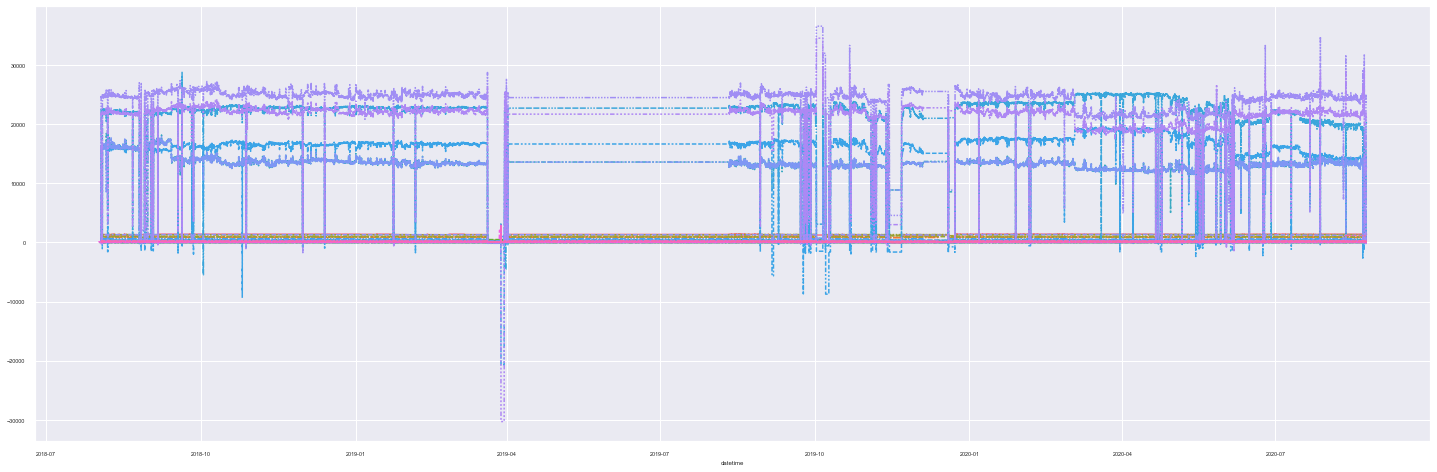

In [83]:
fig, ax = plt.subplots(figsize=(25,8))

compressor_hourly = compressor.set_index('datetime').resample('H').mean()

sns.lineplot(data = compressor_hourly, ax=ax, legend = False)

In [48]:
higher = ['K-1303_Compression_Cylinder_#2', 'K-1303_Tension_Cylinder_#4',
       'K-1303_Compression_Cylinder_#4', 'K-1303_Tension_Cylinder_#2',
       'K-1303_Tension_Cylinder_#1', 'K-1303_Tension_Cylinder_#3']

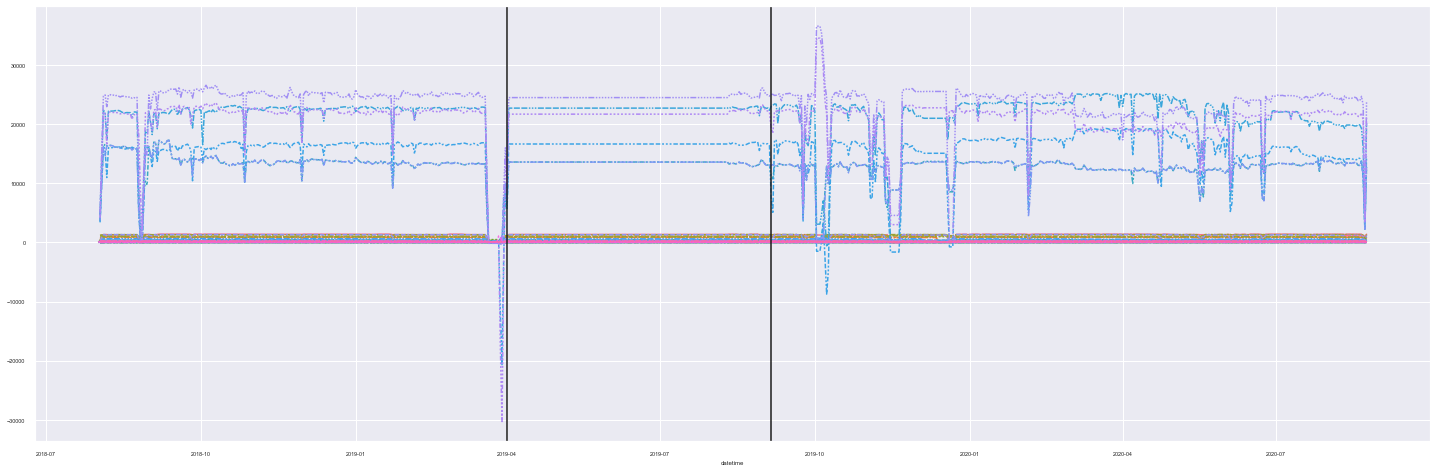

In [85]:
fig, ax = plt.subplots(figsize=(25,8))

compressor_daily = compressor.set_index('datetime').resample('d').mean()

sns.lineplot(data = compressor_daily, ax=ax, legend = False)
plt.axvline(dt.datetime(2019, 4, 1), color='k')
plt.axvline(dt.datetime(2019, 9, 5), color='k')

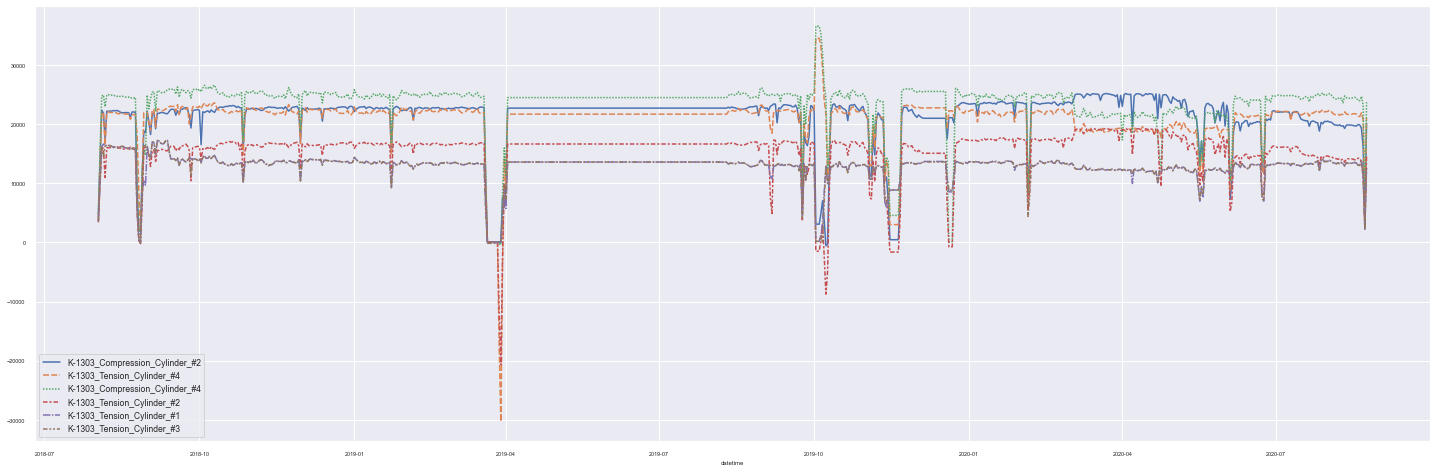

In [94]:
fig, ax = plt.subplots(figsize=(25,8))

compressor_daily = compressor.set_index('datetime').resample('d').mean()

sns.lineplot(data = compressor_daily[higher], ax=ax, legend = True)
plt.legend(fontsize='x-large')

Tension 2 and 4 has negative values. Need input from industrial stakeholders to understand whether negative tension is possible

<AxesSubplot:xlabel='datetime'>

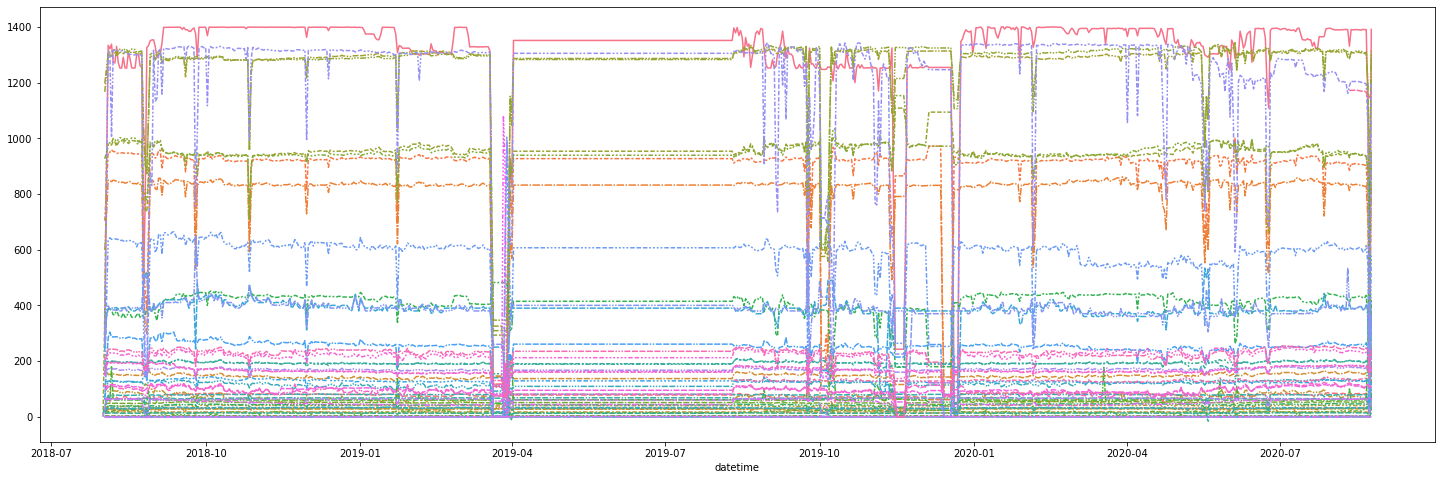

In [57]:
fig, ax = plt.subplots(figsize=(25,8))

compressor_daily = compressor.set_index('datetime').resample('d').mean()

sns.lineplot(data = compressor_daily.loc[:, ~compressor_daily.columns.isin(higher)], ax=ax, legend = False)

In [58]:
len(compressor)

18361

### Null Handling

In [18]:
# missing row by hour 
compressor.isna().sum()

datetime                                                            0
K-1303_Engine_RPM                                                 297
K-1303_Engine_Load_Factor                                         297
K-1303_Fuel_Gas_Pressure                                          297
K-1303_Pre_Catalyst_Temperature                                   297
K-1303_Post_Catalyst_Temperature                                  297
K-1303_Actual_Engine_Timing                                       297
K-1303_Inlet_Air_Temperature                                      297
K-1303_Fuel_Pressure_-_Absolute                                   297
K-1303_Engine_Fuel_Gas_Temperature                                299
K-1303_Fuel_Valve_Position                                        297
K-1303_Actual_Air_to_Fuel_Ratio                                   297
K-1303_Fuel_Valve_Differential_Pressure                           297
K-1303_Left_Bank_Turbine_Inlet_Temperature                        297
K-1303_Left_Bank_Tur

- Train_1_Sales_Pressure is missing majority of thhe value while Train_1_Inlet_Separator_Pressure is missing half of them
- Counting by day, majority of the columns in the training set are missing 11 days of data and missing 1 day in test set

<AxesSubplot:>

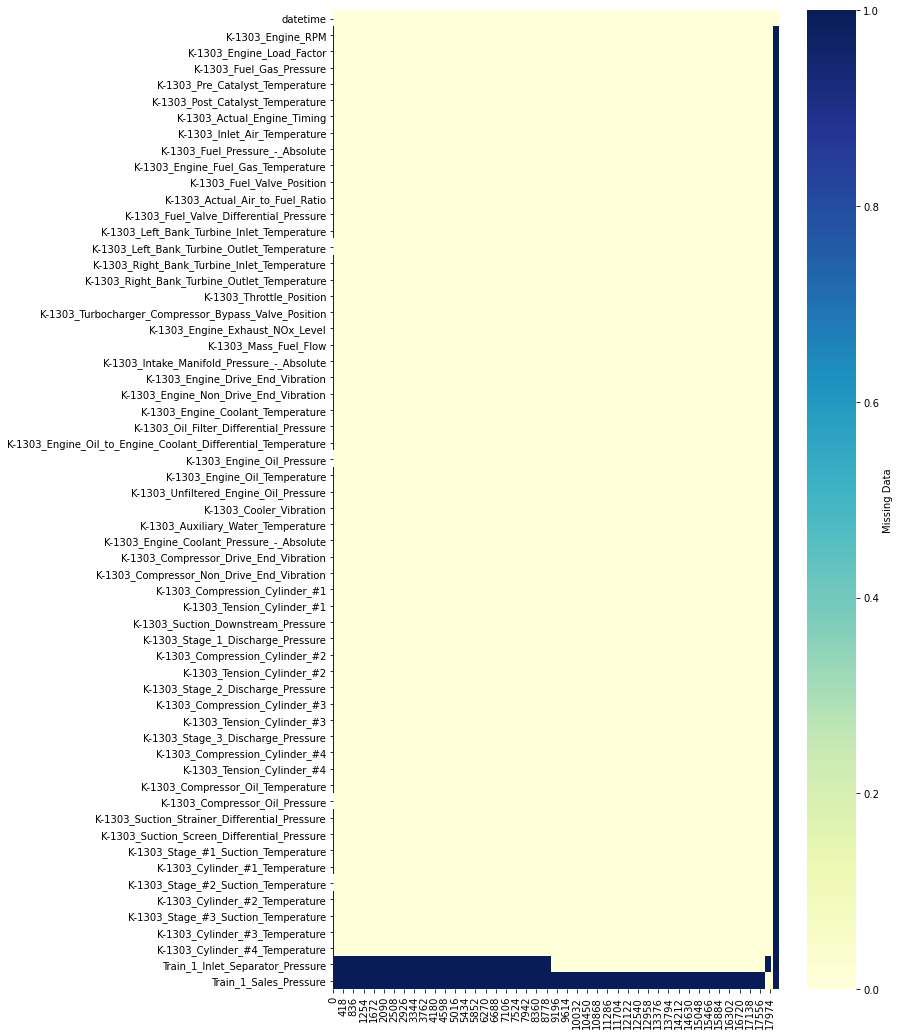

In [25]:
plt.figure(figsize=(10,18))
sns.heatmap(compressor.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

- There are a few missing values in the beginning of the dataframe, and some towards the end. 
- Since the missing values are not spreaded out but rather concetrated, it would not add much value to impute them.
- As for the last two columns, we can take them out

In [20]:
compressor.head()

,datetime,K-1303_Engine_RPM,K-1303_Engine_Load_Factor,K-1303_Fuel_Gas_Pressure,K-1303_Pre_Catalyst_Temperature,K-1303_Post_Catalyst_Temperature,K-1303_Actual_Engine_Timing,K-1303_Inlet_Air_Temperature,K-1303_Fuel_Pressure_-_Absolute,K-1303_Engine_Fuel_Gas_Temperature,...,K-1303_Suction_Screen_Differential_Pressure,K-1303_Stage_#1_Suction_Temperature,K-1303_Cylinder_#1_Temperature,K-1303_Stage_#2_Suction_Temperature,K-1303_Cylinder_#2_Temperature,K-1303_Stage_#3_Suction_Temperature,K-1303_Cylinder_#3_Temperature,K-1303_Cylinder_#4_Temperature,Train_1_Inlet_Separator_Pressure,Train_1_Sales_Pressure
0,2018-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-08-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-08-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-08-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-08-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Dropping the two columns and NaN rows
compressor = compressor.drop(['Train_1_Inlet_Separator_Pressure', 'Train_1_Sales_Pressure'], axis = 1).dropna()

### Correlation Analysis

<AxesSubplot:>

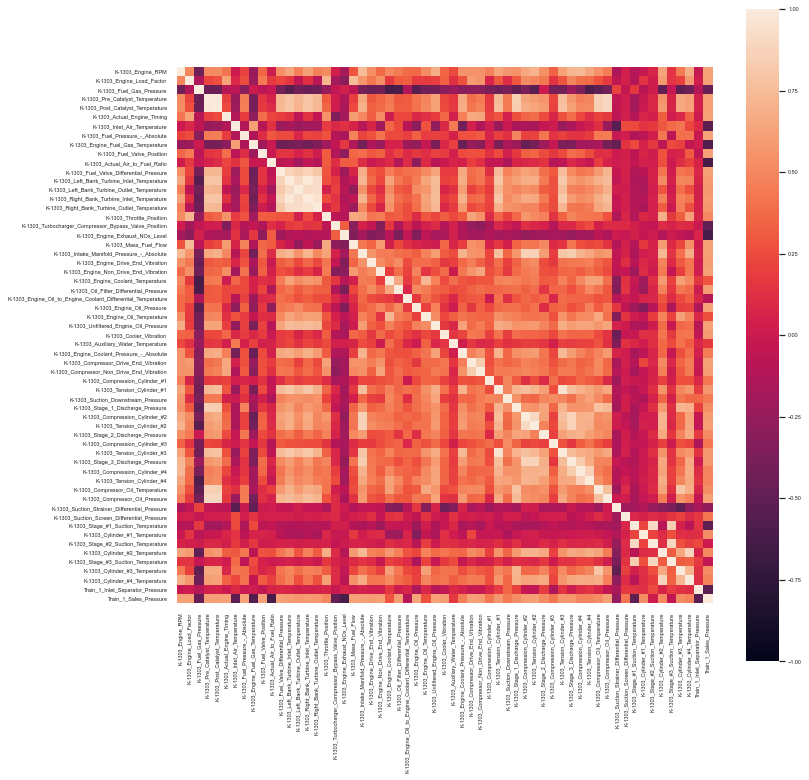

In [97]:
fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(compressor.corr(), square=True, ax=ax, vmin = -1, vmax = 1)

- The turbine temperature and pressure features are highly positively correlated 
- Fuel gas pressure is negatively correlated with many features

### Outliers Handling

Scaling using Robust Scaler to visualize the outliers better

In [107]:
from sklearn.preprocessing import MinMaxScaler


In [108]:
compressor_transformed = MinMaxScaler().fit_transform(compressor.iloc[:, 1:])
compressor_transformed = pd.DataFrame(compressor_transformed, columns = compressor.iloc[:, 1:].columns)

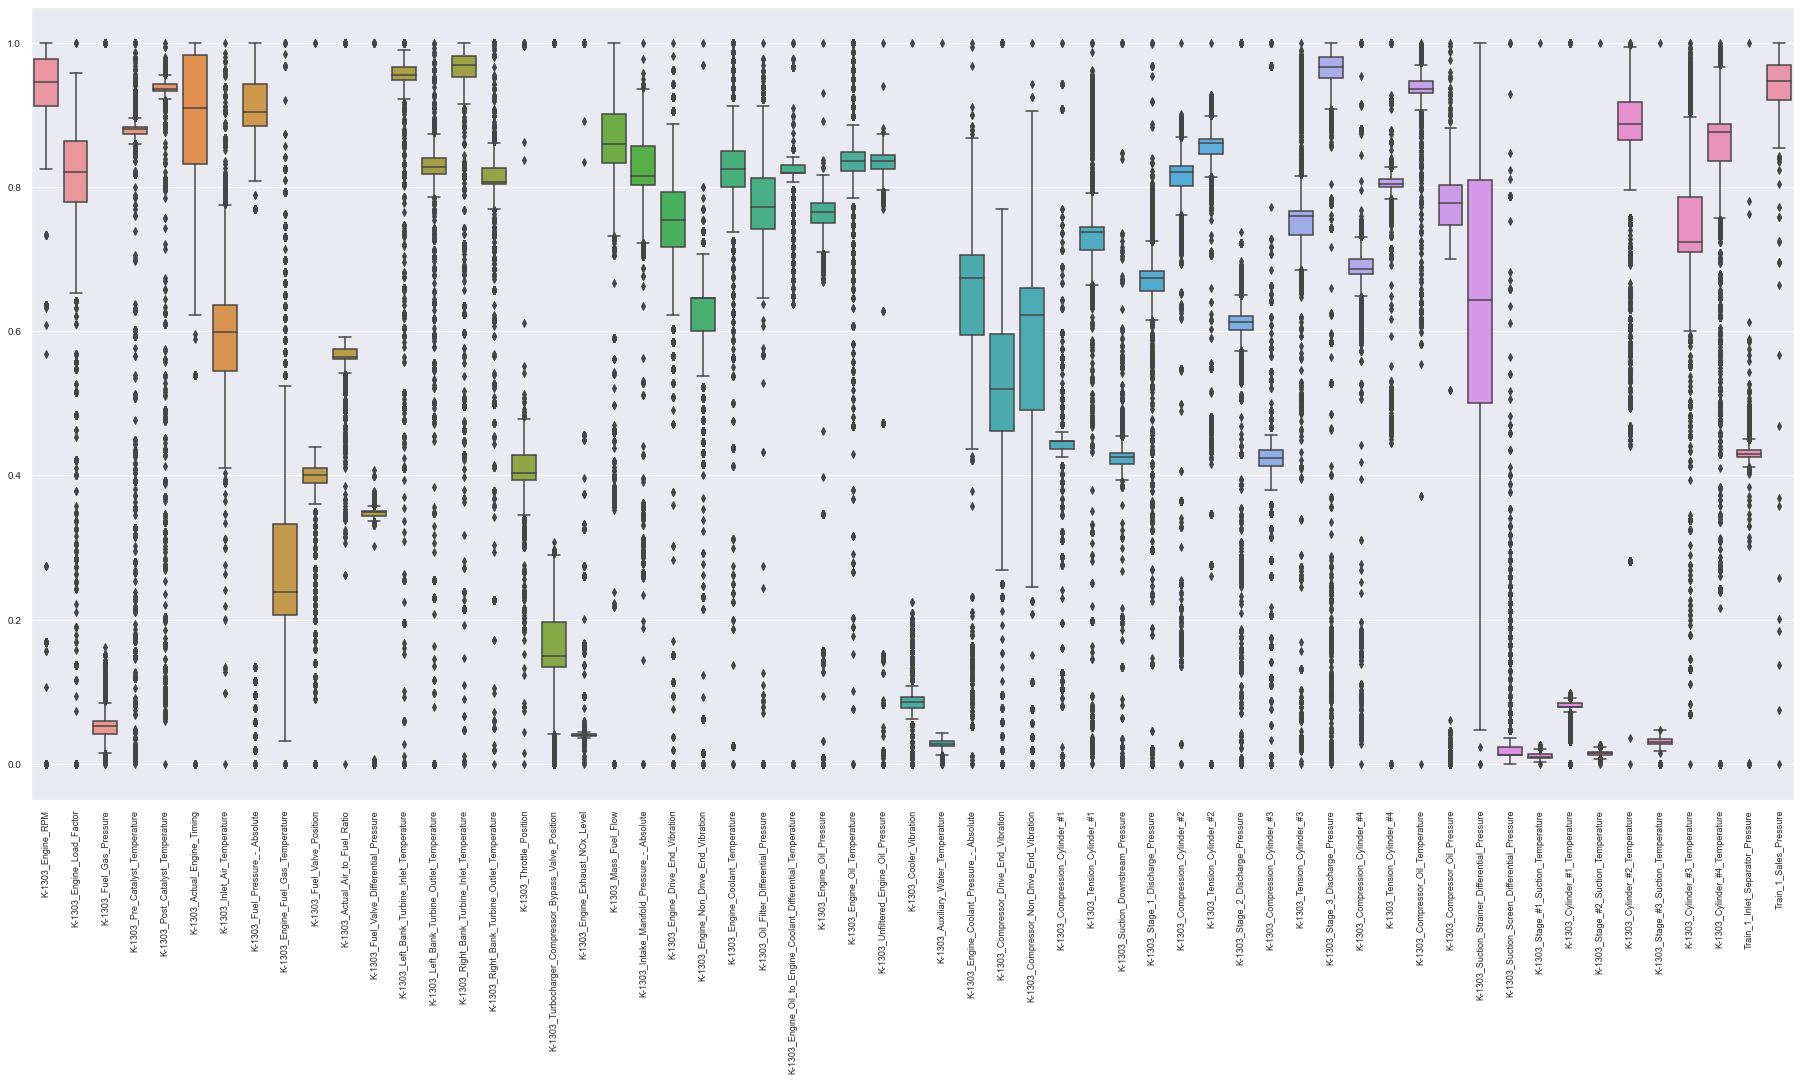

In [111]:
fig, ax = plt.subplots(figsize=(25,15))         

sns.boxplot(data = compressor_transformed, ax=ax)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=10)

plt.tight_layout()

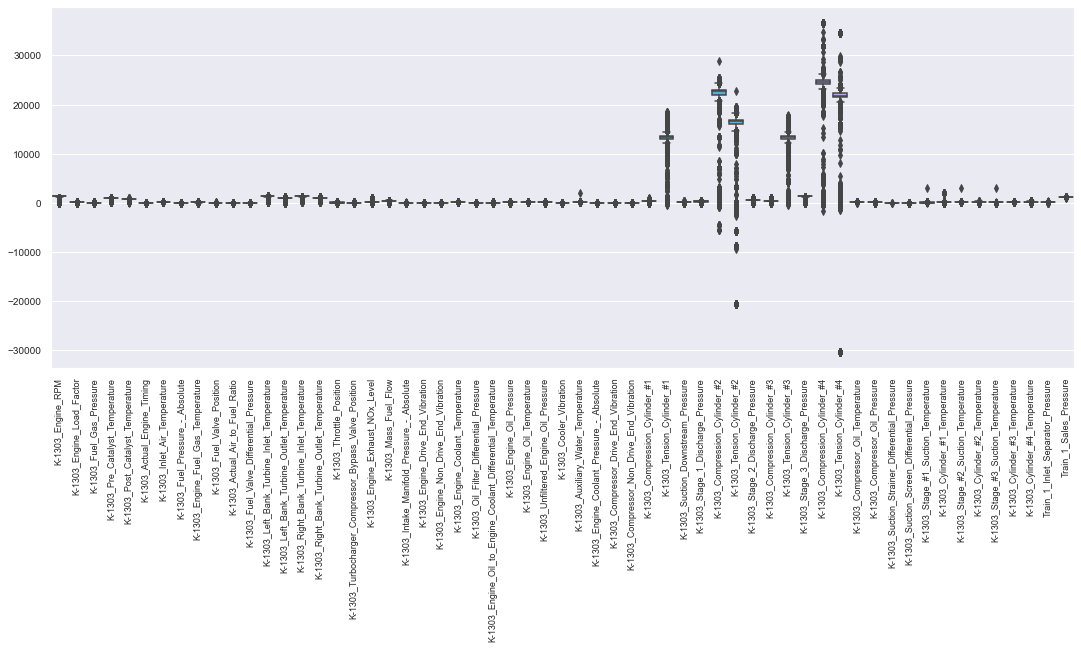

In [99]:
fig, ax = plt.subplots(figsize=(15,9))         

sns.boxplot(data = compressor, ax=ax)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=10)

plt.tight_layout()

In [78]:
compressor.columns

Index(['datetime', 'K-1303_Engine_RPM', 'K-1303_Engine_Load_Factor',
       'K-1303_Fuel_Gas_Pressure', 'K-1303_Pre_Catalyst_Temperature',
       'K-1303_Post_Catalyst_Temperature', 'K-1303_Actual_Engine_Timing',
       'K-1303_Inlet_Air_Temperature', 'K-1303_Fuel_Pressure_-_Absolute',
       'K-1303_Engine_Fuel_Gas_Temperature', 'K-1303_Fuel_Valve_Position',
       'K-1303_Actual_Air_to_Fuel_Ratio',
       'K-1303_Fuel_Valve_Differential_Pressure',
       'K-1303_Left_Bank_Turbine_Inlet_Temperature',
       'K-1303_Left_Bank_Turbine_Outlet_Temperature',
       'K-1303_Right_Bank_Turbine_Inlet_Temperature',
       'K-1303_Right_Bank_Turbine_Outlet_Temperature',
       'K-1303_Throttle_Position',
       'K-1303_Turbocharger_Compressor_Bypass_Valve_Position',
       'K-1303_Engine_Exhaust_NOx_Level', 'K-1303_Mass_Fuel_Flow',
       'K-1303_Intake_Manifold_Pressure_-_Absolute',
       'K-1303_Engine_Drive_End_Vibration',
       'K-1303_Engine_Non_Drive_End_Vibration',
       'K-1303_Engin

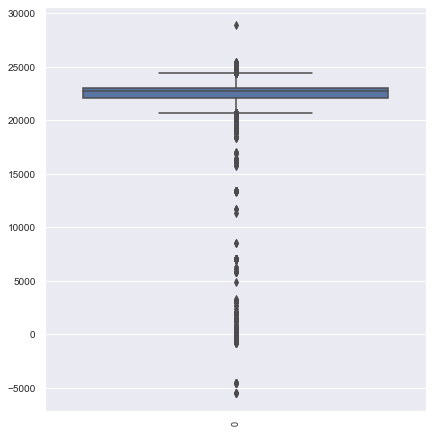

In [80]:
fig, ax = plt.subplots(figsize=(6,6))         

sns.boxplot(data = compressor['K-1303_Compression_Cylinder_#2'], ax=ax)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=10)

plt.tight_layout()


### Scaling and Standardization

Separate period 1 and 2 -  how to handle the period in between??

In [126]:
daily = compressor.set_index('datetime')
period_1 = daily.loc[daily.index >= '2019-09-05']
period_2 = daily.loc[daily.index <= '2019-04-01']